In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import skimage.io
import skimage.morphology
import skimage.segmentation

import warnings

import os.path

import joblib

In [2]:
data_set_dir = "/home/jr0th/github/segmentation/data/set03/"

# masks are 1 for background and 2 for cell
masks = skimage.io.imread_collection(data_set_dir + "raw_labels/*")

# images are in uint (16 bits)
images = skimage.io.imread_collection(data_set_dir + "raw_images/*")

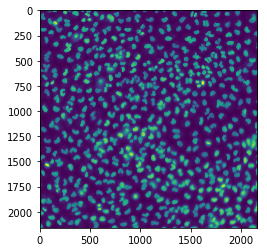

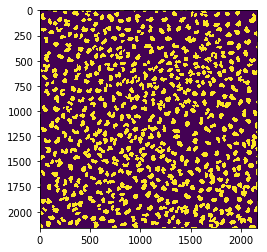

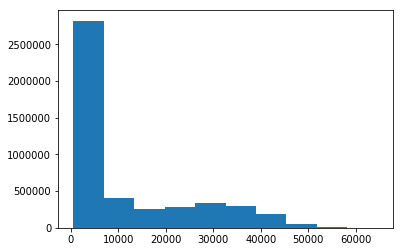

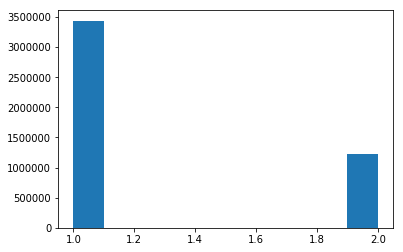

(2160, 2160)
(2160, 2160)


In [3]:
# DEBUG
plt.imshow(images[0])
plt.show()
plt.imshow(masks[0])
plt.show()

plt.hist(images[0].flatten())
plt.show()
plt.hist(masks[0].flatten())
plt.show()

print(images[0].shape)
print(masks[0].shape)

In [4]:
def process_image(index):
    image = images[index]
    name = masks.files[index]
    filename = os.path.basename(name)
    
    # convert in ubyte (8 bit)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        image_8bit = skimage.img_as_ubyte(image)

    # save
    skimage.io.imsave(data_set_dir + 'all_images/' + filename, image_8bit)

In [25]:
joblib.Parallel(n_jobs = 100)(joblib.delayed(process_image)(i) for i in range(len(masks)))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

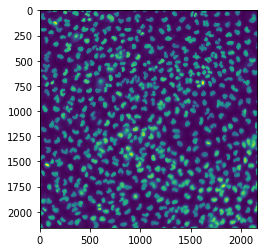

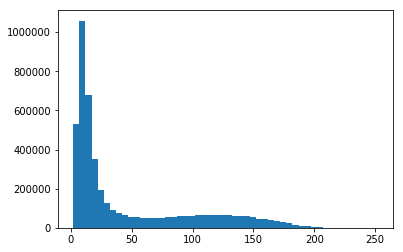

In [26]:
debug_image_8bit = skimage.io.imread('/home/jr0th/github/segmentation/data/set03/all_images/r01c01f01p01-ch1sk1fk1fl1.png')
plt.imshow(debug_image_8bit)
plt.show()

plt.hist(debug_image_8bit.flatten(), bins=50)
plt.show()

In [22]:
def process_label(index):
    mask = masks[index]
    name = masks.files[index]
    filename = os.path.basename(name)
    boundaries = skimage.segmentation.find_boundaries(mask)

    label2d = np.zeros_like(mask)
    # annotate cells
    label2d[mask == 2] = 1

    # annotate boundaries
    label2d[boundaries == 1] = 2
    
    # augment to 3D
    label = np.zeros((label2d.shape[0], label2d.shape[1], 3), dtype = np.bool)

    label[:,:,0] = (label2d == 0)
    label[:,:,1] = (label2d == 1)
    label[:,:,2] = (label2d == 2)
    
    # save
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        skimage.io.imsave(data_set_dir + 'all_labels/' + filename, label)

In [23]:
joblib.Parallel(n_jobs = 100)(joblib.delayed(process_label)(i) for i in range(len(masks)))    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

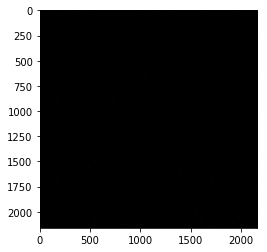

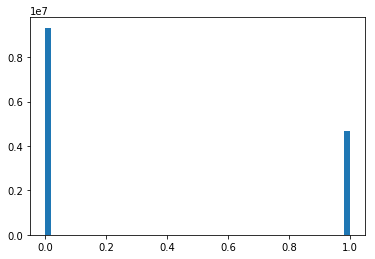

In [24]:
debug_label = skimage.io.imread('/home/jr0th/github/segmentation/data/set03/all_labels/r01c01f01p01-ch1sk1fk1fl1.png')
plt.imshow(debug_label)
plt.show()

plt.hist(debug_label.flatten(), bins=50)
plt.show()
